[*********************100%***********************]  1 of 1 completed


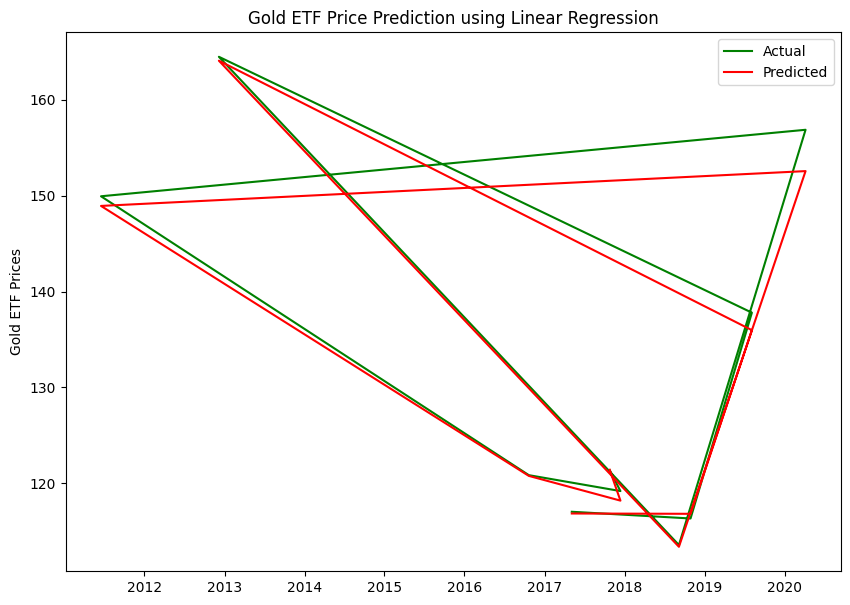

Mean Squared Error: 1.8455405498608595
R-squared: 0.9964253668139734

Last 10 Days' Predictions:
                Actual   Predicted
Date                              
2017-10-25  121.349998  121.391599
2017-12-13  119.169998  118.172722
2016-10-21  120.830002  120.752846
2011-06-17  149.940002  148.932862
2020-04-06  156.880005  152.566632
2018-09-06  113.540001  113.355527
2012-12-06  164.500000  164.092632
2019-08-05  137.789993  135.965339
2018-10-29  116.309998  116.796740
2017-05-05  117.010002  116.828795


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Download data from Yahoo Finance
df = yf.download('GLD', '2008-01-01', '2020-06-22', auto_adjust=True)

# Only keep the 'Close' column
df = df[['Close']]

# Drop rows with missing values
df = df.dropna()

# Create lagged features
for i in range(1, 6):
    df['lag_' + str(i)] = df['Close'].shift(i)

# Drop rows with missing values again
df = df.dropna()

# Create feature matrix X and target variable y
X = df.drop('Close', axis=1)
y = df['Close']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
results_df.index = y_test.index
results_df = results_df.tail(10)

# Plot the results
plt.figure(figsize=(10, 7))
plt.plot(results_df.index, results_df['Actual'], color='g', label='Actual')
plt.plot(results_df.index, results_df['Predicted'], color='r', label='Predicted')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Prediction using Linear Regression")
plt.legend()
plt.show()

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print()
print("Last 10 Days' Predictions:")
print(results_df)



[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-11-b654e46bde46>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Close': pred[0]}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-11-b654e46bde46>:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Close': pred[0]}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-inpu

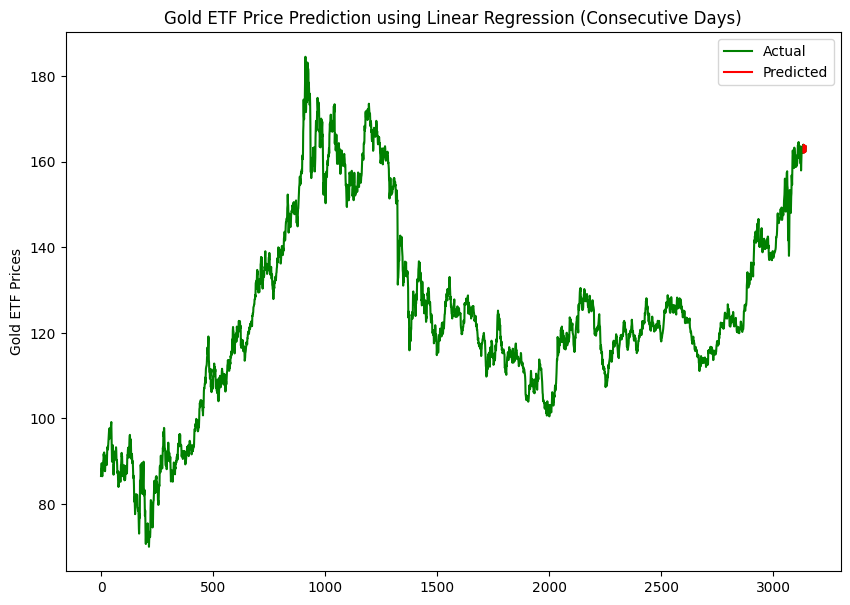

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Download historical data from Yahoo Finance
df = yf.download('GLD', '2008-01-01', '2020-06-22', auto_adjust=True)

# Only keep the 'Close' column
df = df[['Close']]

# Drop rows with missing values
df = df.dropna()

# Create lagged features
for i in range(1, 6):
    df['lag_' + str(i)] = df['Close'].shift(i)

# Drop rows with missing values again
df = df.dropna()

# Create feature matrix X and target variable y
X = df.drop('Close', axis=1).iloc[:, :-1]  # Drop the last lagged feature
y = df['Close']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Get the last 10 consecutive days' predictions
consecutive_days_pred = []
for i in range(10):
    X_last = df.tail(1).drop('Close', axis=1).iloc[:, :-1]  # Drop the last lagged feature
    imputer = SimpleImputer(strategy='mean')
    X_last_imputed = imputer.fit_transform(X_last)
    pred = model.predict(X_last_imputed)
    consecutive_days_pred.append(pred[0])
    # Create lagged features for the next day's prediction
    df = df.append({'Close': pred[0]}, ignore_index=True)
    for j in range(1, 6):
        df['lag_' + str(j)] = df['Close'].shift(j)

# Plot the results
plt.figure(figsize=(10, 7))
plt.plot(df.index, df['Close'], color='g', label='Actual')
plt.plot(df.index[-10:], consecutive_days_pred, color='r', label='Predicted')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Prediction using Linear Regression (Consecutive Days)")
plt.legend()
plt.show()
